# **Regresión Lineal**

### En este archivo desarrollaremos un modelo de regresión lineal. Este modelo nos predecirá el ganador de un partido.

Comenzamos importando todas las dependecias necesarias para el correcto funcionamiento del documento.

In [1]:
# Importamos librerías

# Visualización de datos
%matplotlib inline
import matplotlib.pyplot as plt

# Manipulación de datos
import pandas as pd
import numpy as np

# Preparación de los datos
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Modelos de predicción
from sklearn.linear_model import LinearRegression

# Métricas de evaluación
from sklearn.metrics import mean_squared_error, r2_score

Importamos los datos que usaremos para la predicción.

In [2]:
partidos = pd.read_csv('../../data/partidos_limpio.csv')

Vemos qué tipos de datos tenemos en nustra tabla. Aquellos datos que no sean numéricos debemos convertirlos para que nuestro modelo de regresión lineal los pueda entender.

In [3]:
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 39 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          598 non-null    object 
 1   Round           598 non-null    object 
 2   Day             598 non-null    object 
 3   Date            598 non-null    object 
 4   Results         598 non-null    object 
 5   Home            598 non-null    object 
 6   Country (Home)  598 non-null    object 
 7   Points (Home)   598 non-null    float64
 8   Score (Home)    598 non-null    int64  
 9   Score (Away)    598 non-null    int64  
 10  Points (Away)   598 non-null    float64
 11  Country (Away)  598 non-null    object 
 12  Away            598 non-null    object 
 13  Venue           598 non-null    object 
 14  Referee         598 non-null    object 
 15  # Pl_home       538 non-null    float64
 16  Age_home        538 non-null    float64
 17  MP_home         538 non-null    flo

Usando Label Encoder transformamos los datos categóricos a numéricos. Las columnas 'Home' y 'Away', 'Country (Home)' y 'Country (Away)' las concatenamos antes de aplicar el Label Encoder ya que a pesar de ser columnas diferentes, sus valores describen lo mismo. Las concatenamos para que al aplicar Label Encoder se use el mismo diccionario de clave-valor para ambas columnas.

Además, la columna 'Date' la pasamos a datetime y la separamos en Año, Mes y Día para que esta fecha sea un dato numérico y podamos incluirlo en nuestro modelo.

In [4]:
# Columnas a modificar
cols = ['Season', 'Round', 'Day', 'Results', 'Home', 'Away', 'Country (Home)', 'Country (Away)', 'Venue', 'Referee']

# Inicializamos el label encoder
label_encoder = LabelEncoder()

# Creamos un diccionario para guardar los mapeos
mapping = {}

# Iteramos sobre las columnas y las transformamos
for col in cols:
    # Concatenamos los valores necesarios
    if col in ['Home', 'Away']:
        if 'Squad' not in mapping:
            name = 'Squad'
            squad = pd.concat([partidos['Home'], partidos['Away']])
            label_encoder.fit(squad)      
    elif col in ['Country (Home)', 'Country (Away)']:
        if 'Country' not in mapping:
            name = 'Country'
            country = pd.concat([partidos['Country (Home)'], partidos['Country (Away)']])
            label_encoder.fit(country)
    else:
        name = col
        label_encoder.fit(partidos[col])
    
    # Transformamos los valores 
    partidos[col] = label_encoder.transform(partidos[col])
    
    # Creamos un mapeo de los valores
    mapping[name] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Transformamos la columna 'Date' a datetime
partidos['Date'] = pd.to_datetime(partidos['Date'])

# Separar la fecha en año, mes y día
partidos['Year'] = partidos['Date'].dt.year
partidos['Month'] = partidos['Date'].dt.month
partidos['Number Day'] = partidos['Date'].dt.day # Lo llamamos 'Number Day' para evitar confusiones con la columna 'Day' que ya existe

# Eliminamos la columna 'Date'
partidos.drop('Date', axis=1, inplace=True)

# Verificamos los cambios
partidos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 598 entries, 0 to 597
Data columns (total 41 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Season          598 non-null    int32  
 1   Round           598 non-null    int32  
 2   Day             598 non-null    int32  
 3   Results         598 non-null    int32  
 4   Home            598 non-null    int32  
 5   Country (Home)  598 non-null    int32  
 6   Points (Home)   598 non-null    float64
 7   Score (Home)    598 non-null    int64  
 8   Score (Away)    598 non-null    int64  
 9   Points (Away)   598 non-null    float64
 10  Country (Away)  598 non-null    int32  
 11  Away            598 non-null    int32  
 12  Venue           598 non-null    int32  
 13  Referee         598 non-null    int32  
 14  # Pl_home       538 non-null    float64
 15  Age_home        538 non-null    float64
 16  MP_home         538 non-null    float64
 17  Starts_home     538 non-null    flo

Eliminamos aquellas filas que contengan algún dato nulo.

In [5]:
partidos = partidos.dropna()

Una vez convertidos todos los datos a numéricos, podemos comenzar a desarrollar nuestro modelo de regresión lineal.

In [6]:
# Definimos las variables X e y (variable objetivo)
X = partidos.drop(labels=['Results', 'Score (Home)', 'Score (Away)', 'Referee'], axis=1)
y = partidos['Results']

# Dividimos los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

# Creamos el modelo de regresión lineal y lo entrenamos
model = LinearRegression().fit(X_train, y_train)

# Realizamos predicciones
predictions = model.predict(X_test)
np.set_printoptions(suppress=True) # Evitamos la notación científica

# Comparamos las predicciones con los valores reales mostrando solo 10 valores en pantalla
print('Results         : ', mapping['Results']) # Mostramos el mapeo de los valores para saber a qué corresponde cada valor
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10].tolist())

Results         :  {'A': 0, 'D': 1, 'H': 2}
Predicted labels:  [0. 1. 0. 2. 2. 1. 2. 1. 2. 1.]
Actual labels   :  [0, 1, 0, 2, 1, 2, 2, 1, 2, 0]


Una vez entrenado el modelo y habiendo hecho predicciones, es hora de evaluarlo.

In [7]:
# Calculamos las métricas de evaluación

# MSE (Mean Squared Error) - Error Cuadrático Medio
# Sirve para medir la calidad de un estimador. Mientras más bajo sea el valor, mejor es el estimador
mse = mean_squared_error(y_test, predictions)
print("MSE :", mse)

# RMSE (Root Mean Squared Error) - Raíz del Error Cuadrático Medio
# Es la raíz cuadrada del MSE. Mientras más bajo sea el valor, mejor es el estimador
rmse = np.sqrt(mse)
print("RMSE:", rmse)

# R2 (R cuadrado) - Coeficiente de determinación
# Es una medida que indica cuánto de la variabilidad de la variable dependiente es explicada por el modelo
r2 = r2_score(y_test, predictions)
print("R2  :", r2)

MSE : 0.6121389130015432
RMSE: 0.7823930680940004
R2  : 0.1788922242365193


- El MSE es aproximadamente 0.612. Esto significa que, en promedio, el cuadrado de la diferencia entre las predicciones del modelo y los valores reales es de alrededor de 0.612. Un MSE más bajo indica un mejor ajuste del modelo a los datos, lo que sugiere que el modelo tiene un nivel moderado de error en sus predicciones.

- El RMSE es aproximadamente 0.782. Esto significa que, en promedio, el modelo tiene un error de alrededor de 0.782 en sus predicciones en la misma escala que la variable que estás tratando de predecir. Un RMSE más bajo también indica un mejor ajuste del modelo.

- El R2 es aproximadamente 0.179. Esto significa que alrededor del 17.9% de la variabilidad en la variable dependiente es explicada por el modelo. Un R2 más alto indica un mejor ajuste del modelo a los datos, pero en este caso, el valor relativamente bajo de R2 sugiere que el modelo puede no estar capturando completamente la variabilidad en los datos.

En resumen, el modelo de regresión lineal no tiene un buen desempeño, por lo que se podría tratar de mejorar su capacidad predictiva y explicativa. 

Por último, hagamos un gráfico que muestre los resultados que nuestro modelo ha predicho.

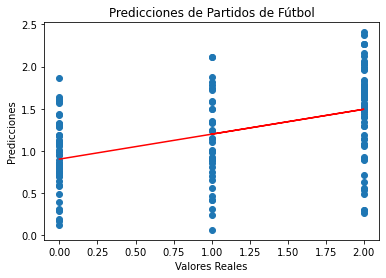

In [8]:
plt.scatter(y_test, predictions)
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Predicciones de Partidos de Fútbol')

z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)

plt.plot(y_test,p(y_test), color='red')
plt.show()